<div class="alert alert-info">
<font size="4"><b>Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
    Привет, Виктор! Спасибо, что прислал задание :) <br>Меня зовут Никита Сон и я буду проверять твой проект. Предлагаю обращаться друг к другу на ты, как это принято в Практикуме, если ты не против. Но если хочешь на Вы - не буду возражать 🙂
        
Поехали 🚀
    <br />

Мои комментарии обозначены пометкой <b>Комментарий ревьюера</b>. При внесении правок в проект, пожалуйста, не меняй и не удаляй их т.к. дальнейшая проверка будет происходить в том числе на основе того, исправлены замечания в комментариях или нет. Зато ты всегда можешь оставить свои комментарии для меня :)
    </font>
</div>

<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
В зелёных блоках будут позитивные комментарии
<br />
    </font>
</div>

<div class="alert alert-warning">
<font size="4"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
В жёлтых - некритичные замечания
    </font>
</div>

<div class="alert alert-danger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 
В красных - важные замечания, которые надо обязательно устранить
    </font>
</div>

<div class="alert alert-info">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 
В синих с пиццей - различные нейтральные сообщения, советы на будещее и прочее.
    </font>
</div>

# Определение возраста покупателей

**Заказчик:** Сетевой супермаркет «Хлеб-Соль»



**Описание проекта:** 

Заказчик внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:
- Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
- Контролировать добросовестность кассиров при продаже алкоголя.



**Описание данных**

датасет с сайта ChaLearn Looking at People. Содержит фотографии лиц и метки возраста человека на изображении.

- По пути /datasets/faces/labels.csv находится CSV-файл labels.csv с двумя колонками: file_name и real_age.
- По пути  /datasets/faces/final_files находится папка со всеми изображениями.

**Цель проекта:** 

- построить модель, которая по фотографии определит приблизительный возраст человека. (задача регрессии) Метрика качества — MAE. Необходимо получить её значение не больше 8

**Ход исследования**
- **Подготовка данных, исследовательский анализ**: загрузка и изучение общей информации о предоставленном датасете. Корректировка типов данных, дубликатов и пропусков. Построение графика распределения возраста в выборке. Вывод на экран 15 фотографий.

- **Обучение и оценка модели**: обучение нейросетевой модели для задачи регрессии. Оценка качества, выводы по обучению.

- **Общий вывод** и подведение итогов по проделанным работам, рекомендации заказчику.

<a id=содержание></a>
### **Содержание**

[Шаг 1. Подготовка данных, исследователский анализ](#1)

[Шаг 2. Обучение и анализ модели](#2)

[Шаг 3. Общий вывод](#3)

<a id=1></a>
## Подготовка и исследовательский анализ данных
[Назад к содержанию](#содержание)

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
pth = '/datasets/faces/labels.csv'
if os.path.exists(pth):
    faces = pd.read_csv(pth)
    display(faces.head(), faces.shape)
else:
    print('Something is wrong')

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


(7591, 2)

<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
        <b></b>

Безопасная загрузка - это добро

Всего в датасете два столбца и 7591 наблюдение. Далее проверим соответствие признаков и типов данных.

In [3]:
faces.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


Типы данных распределены корректно. Проверим данные на наличие пропусков.

In [4]:
faces.isna().sum()

file_name    0
real_age     0
dtype: int64

Пропуски отсутствуют, проверим наличие дубликатов.

In [5]:
display(faces.duplicated().sum(), faces.duplicated(subset='file_name').sum())

0

0

Явные и неявные дубликаты отсутствуют. Далее визуализируем график распределения возраста в выборке.

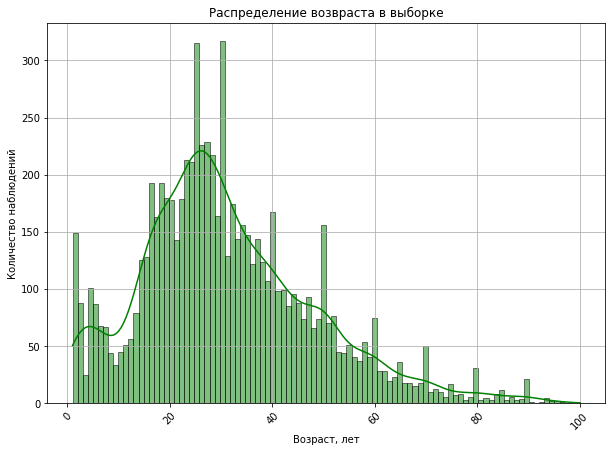

30    317
25    315
27    229
26    226
28    217
23    213
24    211
18    193
16    193
19    180
Name: real_age, dtype: int64

78     3
81     3
83     3
88     3
95     2
96     2
93     1
100    1
91     1
97     1
Name: real_age, dtype: int64

In [6]:
plt.figure(figsize=(10,7))
sns.histplot(data=faces, x='real_age', color='green', kde=True, bins=100) # РЕВЕЬЮЕР: добавим корзин
plt.title('Распределение возвраста в выборке')
plt.ylabel('Количество наблюдений')
plt.xlabel('Возраст, лет')
plt.xticks(rotation=45)
plt.grid()
plt.show()

display(
    faces['real_age'].value_counts().head(10),
    faces['real_age'].value_counts().tail(10)
)

<div class="alert alert-warning">
<font size="4"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Смотри какие интересные особенности проявляются, если взять побольше корзин. Сразу видно подозрительные пики в 40, 50, 60 и тд лет, что наводит мысль, что данные могут быть частично округлены. Выбор адекватного числа корзин для гистограммы - отдельный вид искусства, но когда значения дискретны, можно просто брать столько, сколько всего есть разных значения, в нашем случае =100

Чаще всего встречаются фото людей в возрасте 30 лет (317 набл.), 25 (315 набл.), 27 (229 набл.), 26(226 набл.), и 28 лет (217 набл.)

Реже всего — фото людей в возрасте 97 лет (1 набл.), 91 (1 набл.), 100 (1 набл.), 93(1 набл.), 96 (2 набл.) и 95 лет (2 набл.).

Пускай типы данных и распределены корректно, но для дальнейшей визуализации фото нужно привести признак real_age к типу string (object)

In [7]:
faces['real_age'] = faces['real_age'].astype(str)
faces.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   object
dtypes: object(2)
memory usage: 118.7+ KB


Далее инициализируем класс ImageDataGenerator и с его помощью создадим датасет с изображениями.

In [8]:
datagen = ImageDataGenerator(
            validation_split=0.25,
            rescale=1./255,      
            fill_mode='nearest'
            )


data = datagen.flow_from_dataframe(
            dataframe=faces,
            directory='/datasets/faces/final_files',
            x_col='file_name',  
            y_col='real_age',
            target_size=(150, 150),
            batch_size=32,
            class_mode='sparse',
            subset='training',
            seed=12345
            )

Found 5694 validated image filenames belonging to 97 classes.


Визуализируем 15 фото:

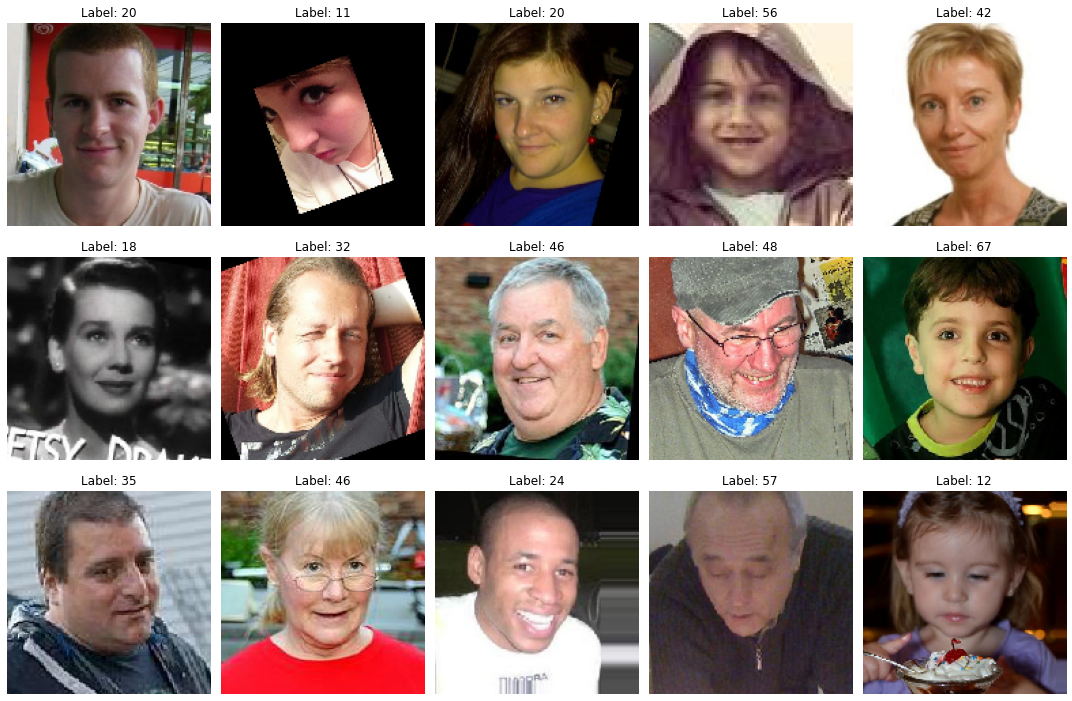

In [9]:
images_shown = 0
plt.figure(figsize=(15, 10))

while images_shown < 15:

    imgs, labels = next(data)
    for i in range(len(imgs)):
        if images_shown >= 15:
            break
        images_shown += 1
        plt.subplot(3, 5, images_shown)  
        plt.imshow(imgs[i])
        plt.title(f"Label: {int(labels[i])}")
        plt.axis('off')
        
plt.tight_layout()
plt.show()

<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
        <b></b>

Молодец, что подписал изображения указанным в таргете возрастом. Это даёт возможность оценить адекватность разметки.

**Выводы по загрузке и подготовке данных, по исследовательскому анализу**

- Всего в датасете два столбца и 7591 наблюдение;
- Пропуски и дубликаты отсутствуют;
- Тип данных признака faces['real_age'] изменен на object для дальнешей загрузки датасета с фотографиями;
- Больше всего фотографий для молодых людей возраста 20-30 лет, а меньше всего для пожилых 78-100 лет. 

Скорее всего, обученная на этом датасете модель будет крайне неточно определять возраст пожилых людей, так как их фото практически отсутствуют в выборке. Однако она будет хорошо справляться с определением возраста 20-30 лет. Для возрастов от 0 до 20, а также от 30 до 60 качество предсказания будет средним.

<div class="alert alert-info">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Как-то по выведенным фотографиям в выводе ничего и нет, а там есть что написать: и что ечть чёрно-белые изображения, что люди в разных позах, есть кропнутые и повёрнутые изображения и тд и тп. В общем, весьма разнообразный датасет, что нас вполне устраивает.

<a id=2></a>
## Обучение и анализ модели 
[Назад к содержанию](#содержание)

<div class="alert alert-info">
<h2> Комментарий студента V.0 <a class="tocSkip"> </h2>

Привет! Не уверен, связаны ли как-то наши обычные импорты в ячейке кода с импортами для GPU тренажера — поэтому дублирую импорты и здесь
</div>

<div class="alert alert-info">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Не связаны. Но можно и ещё раз прописать, никаких проблем :)

```python

import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import regularizers

def load_train(path, image_size=(224, 224), batch_size=32):
    labels_df = pd.read_csv(os.path.join(path, 'labels.csv'))
    train_datagen = ImageDataGenerator(
        rescale=1./255, 
        validation_split=0.2
    )
    
    train_data = train_datagen.flow_from_dataframe(
        dataframe=labels_df,
        directory=os.path.join(path, 'final_files'),
        x_col='file_name',
        y_col='real_age',
        target_size=image_size,
        batch_size=batch_size,
        class_mode='raw',
        subset='training'
    )
    return train_data

def load_test(path, image_size=(224, 224), batch_size=32):
    test_df = pd.read_csv(os.path.join(path, 'labels.csv'))
    test_datagen = ImageDataGenerator(rescale=1./255)
    
    test_data = test_datagen.flow_from_dataframe(
        dataframe=test_df,
        directory=os.path.join(path, 'final_files'),
        x_col='file_name',
        y_col='real_age',
        target_size=image_size,
        batch_size=batch_size,
        class_mode='raw'
    )
    
    return test_data

def create_model(input_shape=(224, 224, 3)):

    model = Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1))

    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer='adam', loss='mae', metrics=['mae'])
    
    return model

def train_model(model, train_data, test_data, batch_size=None, epochs=18,
                steps_per_epoch=None, validation_steps=None):
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

    model.fit(
        train_data,
        epochs=epochs,
        batch_size=batch_size,
        steps_per_epoch=steps_per_epoch if steps_per_epoch is not None else len(train_data),
        validation_steps=validation_steps if validation_steps is not None else len(test_data),
        validation_data=test_data,
        verbose=2,
        callbacks=[early_stopping, reduce_lr]
    )
    return model

```

<div class="alert alert-warning">
<font size="4"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Очень малый размер датасета явно подталкивает к использованию аугментации

Результат вывода модели на экран

```

Train for 190 steps, validate for 238 steps
Epoch 1/18
2025-06-17 16:48:15.406718: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2025-06-17 16:48:15.692311: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
190/190 - 69s - loss: 13.7392 - mae: 13.7436 - val_loss: 12.4526 - val_mae: 12.4548
Epoch 2/18
190/190 - 68s - loss: 12.5771 - mae: 12.5804 - val_loss: 12.5060 - val_mae: 12.5049
Epoch 3/18
190/190 - 69s - loss: 12.1622 - mae: 12.1641 - val_loss: 12.3140 - val_mae: 12.3116
Epoch 4/18
190/190 - 68s - loss: 11.7678 - mae: 11.7697 - val_loss: 11.2860 - val_mae: 11.2908
Epoch 5/18
190/190 - 68s - loss: 11.3972 - mae: 11.3970 - val_loss: 11.4487 - val_mae: 11.4498
Epoch 6/18
190/190 - 67s - loss: 10.7638 - mae: 10.7660 - val_loss: 10.5953 - val_mae: 10.5995
Epoch 7/18
190/190 - 68s - loss: 10.4193 - mae: 10.4209 - val_loss: 10.2776 - val_mae: 10.2842
Epoch 8/18
190/190 - 68s - loss: 9.6358 - mae: 9.6365 - val_loss: 10.3347 - val_mae: 10.3364
Epoch 9/18
190/190 - 68s - loss: 9.2095 - mae: 9.2104 - val_loss: 9.2299 - val_mae: 9.2341
Epoch 10/18
190/190 - 68s - loss: 8.5244 - mae: 8.5258 - val_loss: 8.1153 - val_mae: 8.1198
Epoch 11/18
190/190 - 69s - loss: 7.7251 - mae: 7.7259 - val_loss: 7.5914 - val_mae: 7.6013
Epoch 12/18
190/190 - 72s - loss: 6.8651 - mae: 6.8662 - val_loss: 7.0838 - val_mae: 7.0823
Epoch 13/18
190/190 - 68s - loss: 6.1767 - mae: 6.1776 - val_loss: 6.8540 - val_mae: 6.8482
Epoch 14/18
190/190 - 68s - loss: 5.8558 - mae: 5.8570 - val_loss: 6.4030 - val_mae: 6.4041
Epoch 15/18
190/190 - 70s - loss: 5.2281 - mae: 5.2290 - val_loss: 5.8765 - val_mae: 5.8678
Epoch 16/18
190/190 - 71s - loss: 5.0229 - mae: 5.0248 - val_loss: 5.4506 - val_mae: 5.4444
Epoch 17/18
190/190 - 67s - loss: 4.3059 - mae: 4.3076 - val_loss: 5.2481 - val_mae: 5.2400
Epoch 18/18
190/190 - 68s - loss: 4.0101 - mae: 4.0109 - val_loss: 4.9403 - val_mae: 4.9370
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
238/238 - 39s - loss: 4.9403 - mae: 4.9370

```

<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />    
Метрика
<img src="https://kartinkof.club/uploads/posts/2022-03/1648241141_25-kartinkof-club-p-mem-priemlemo-s-kotom-25.jpg" width=300>

### Анализ обученной модели

- В ходе обучения достигнуто необходимое значение метрики MAE — 4.937, что меньше восьми.
- Судя по значению метрики на каждой эпохе, мы не можем сделать вывод о переобучении или недообучении модели.Если бы она переобучилась, то метрика на обучающей выборке была бы сильно выше, чем на тестовой — а это не так. Значение val_mae отличается от значения mae незначительно, это справедливо для каждой из эпох.
- Недообучение также не произошло, ведь необходимый порог метрики достигнут.
- Высокая метрика была достигнута за счёт относительно простой архитектуры. Три свёрточных слоя, слой с преобразованием тензора и 2 полносвязных слоя.

- В проекте не понадобилось использовать более сложные архитектуры по типу Resnet50. Также в итоговой модели никак не применялись dropout и BatchNormalization, аугментации изображений.

<a id=3></a>
## Общий вывод
[Назад к содержанию](#содержание)

### Загрузка и подготовка данных, EDA

- Всего в датасете два столбца и 7591 наблюдение;
- Пропуски и дубликаты отсутствуют;
- Тип данных признака faces['real_age'] изменен на object для дальнешей загрузки датасета с фотографиями;
- Больше всего фотографий для молодых людей возраста 20-30 лет, а меньше всего для пожилых 78-100 лет. 

Скорее всего, обученная на этом датасете модель будет крайне неточно определять возраст пожилых людей, так как их фото практически отсутствуют в выборке. Однако она будет хорошо справляться с определением возраста 20-30 лет. Для возрастов от 0 до 20, а также от 30 до 60 качество предсказания будет средним.

### Обучение и анализ модели

- В ходе обучения достигнуто необходимое значение метрики MAE — 4.937, что меньше восьми.
- Судя по значению метрики на каждой эпохе, мы не можем сделать вывод о переобучении или недообучении модели.Если бы она переобучилась, то метрика на обучающей выборке была бы сильно выше, чем на тестовой — а это не так. Значение val_mae отличается от значения mae незначительно, это справедливо для каждой из эпох.
- Недообучение также не произошло, ведь необходимый порог метрики достигнут.
- Высокая метрика была достигнута за счёт относительно простой архитектуры. Три свёрточных слоя, слой с преобразованием тензора и 2 полносвязных слоя.

- В проекте не понадобилось использовать более сложные архитектуры по типу Resnet50. Также в итоговой модели никак не применялись dropout и BatchNormalization, аугментации изображений.

### Рекомендации заказчику

Поскольку возрастные группы и предпочтения покупателей могут изменяться, важно регулярно обновлять модель. Рекомендую периодически проводить переобучение модели на новых данных. Также важно учесть, что мы обучали модель на датасете, взятом со стороннего ресурса — а не на фото непосредственно покупателей. Это может  в дальнейшем сказаться на различных характеристиках выборки и повлиять на результаты модели.

<div class="alert alert-success">
<font size="4"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />    
Итоговый вывод и рекоммендации вполне ОК.

И настало время подвести итоги. Несмотря на пару жёлтых, всё очень даже ок, причин для доработки не вижу, принимаю твой проект. Если будут вопросы по моему ревью - обращайся через куратора, я отвечу.

Успехов с последюущими заданиями курса!

## Чек-лист

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Исследовательский анализ данных выполнен
- [x]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [x]  MAE модели не больше 8
- [x]  Код обучения модели скопирован в финальную тетрадь
- [x]  Результат вывода модели на экран перенесён в финальную тетрадь
- [x]  По итогам обучения модели сделаны выводы